In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
iris_data = pd.read_csv(r'C:\pyml_scripts\iris-data.csv', na_values=['NA'] ) 

In [3]:
iris_data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


In [4]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_data.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,145.000000,150
unique,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,Iris-virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.644627,3.054667,3.758667,1.236552,NaN
std,1.312781,0.433123,1.764420,0.755058,NaN
min,0.055000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.400000,NaN
50%,5.700000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


<AxesSubplot: >

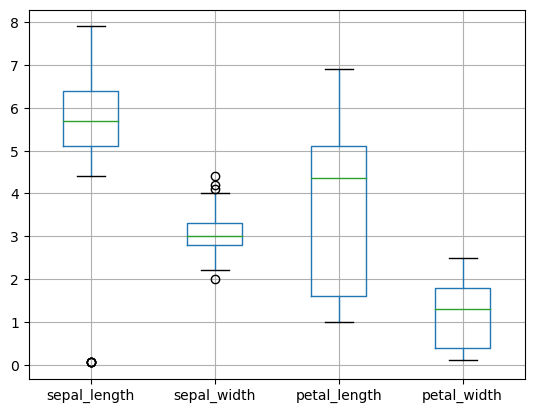

In [6]:
#使用盒形圖找出異常資料
iris_data.boxplot()

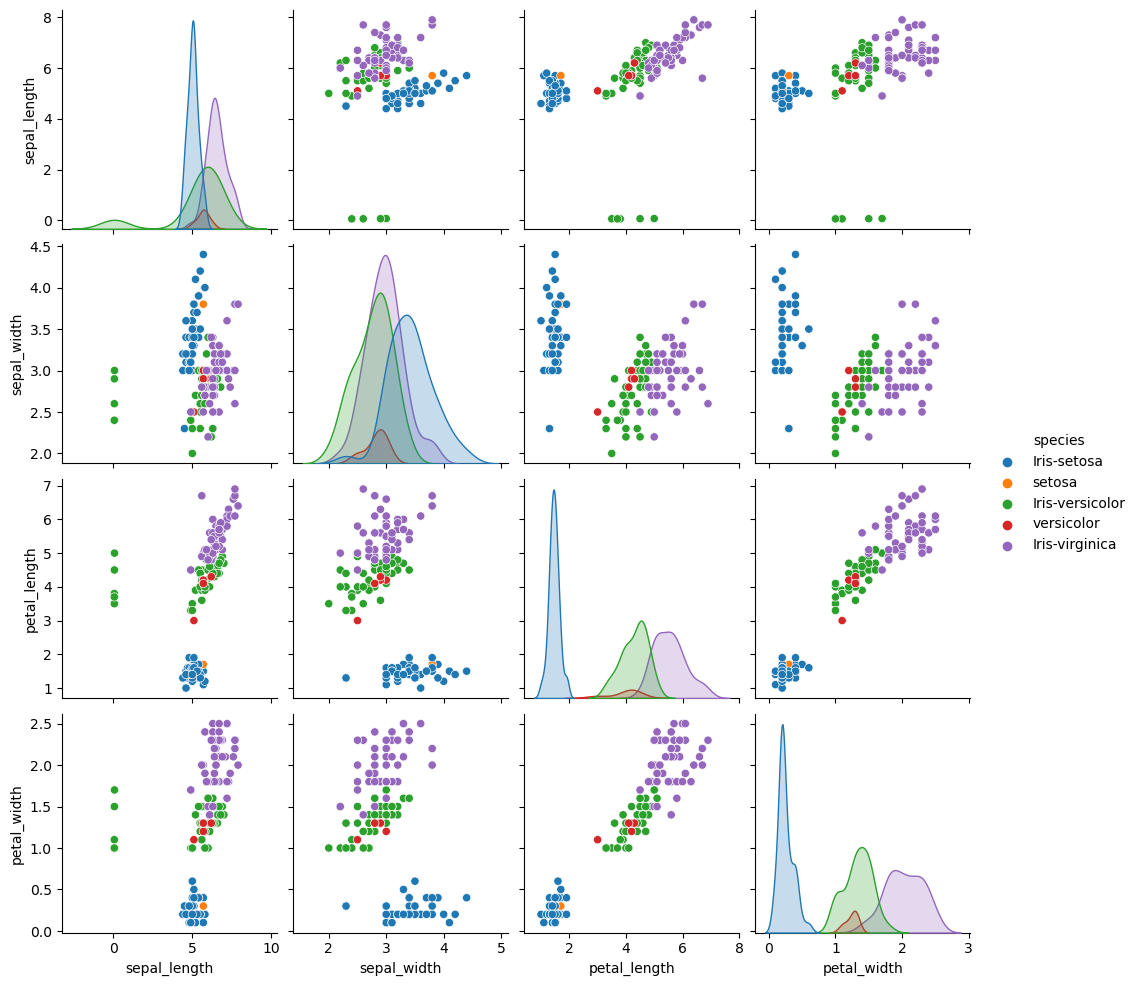

In [7]:
#hue參數可以帶入類別欄位,每個類別將以不同顏色繪製
sns.pairplot(iris_data.dropna(), hue='species') 
plt.show()

In [8]:
iris_data['species'].unique()

array(['Iris-setosa', 'setosa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [9]:
#修正類別名稱
iris_data.loc[iris_data['species'] == 'versicolor', 'species'] = 'Iris-versicolor'
iris_data.loc[iris_data['species'] == 'setosa', 'species'] = 'Iris-setosa'
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

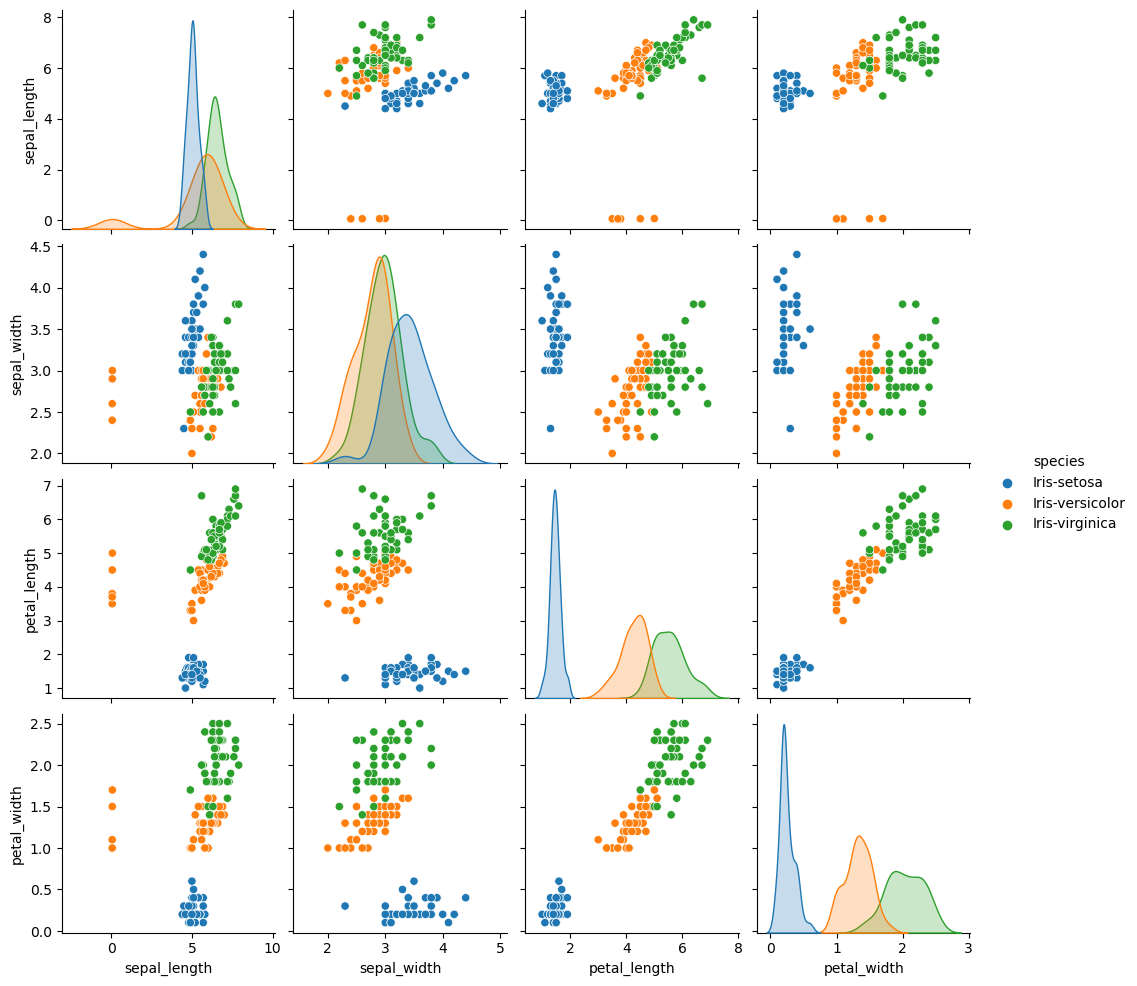

In [10]:
#修正類別名稱後,重新顯示
sns.pairplot(iris_data.dropna(), hue='species')
plt.show()

### 從上面圖像看來,有些樣本的花萼長度(speal_length)/寬度(speal_width)好像有點問題\

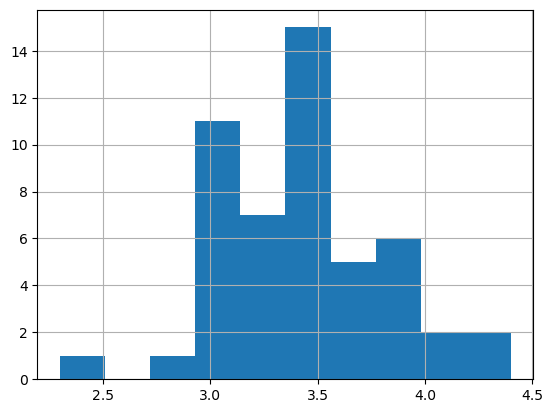

In [11]:
iris_data.loc[iris_data['species'] == 'Iris-setosa','sepal_width'].hist()
plt.show()

In [12]:
#找出異常的花萼寬度的樣本(根據知識(經驗)setosa的花萼不可能小於2.5公分)
cond = (iris_data['species'] == 'Iris-setosa') & (iris_data['sepal_width'] < 2.5)
iris_data.loc[cond]

,sepal_length,sepal_width,petal_length,petal_width,species
41,4.5,2.3,1.3,0.3,Iris-setosa


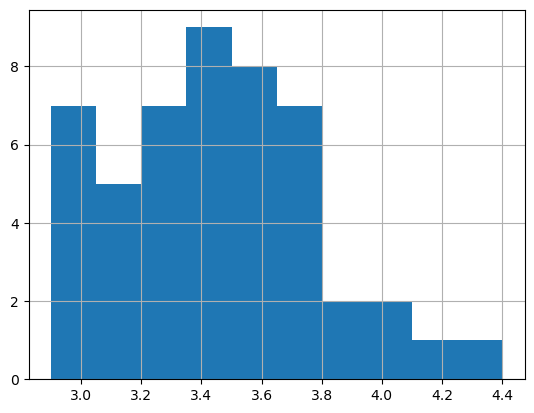

In [13]:
#因為錯誤筆數少,所以直接刪除錯誤資料(花萼寬度小於2.5公分)
iris_data = iris_data.loc[~cond]

#檢視是否已經移除錯誤資料
iris_data.loc[iris_data['species'] == 'Iris-setosa','sepal_width'].hist()
plt.show()

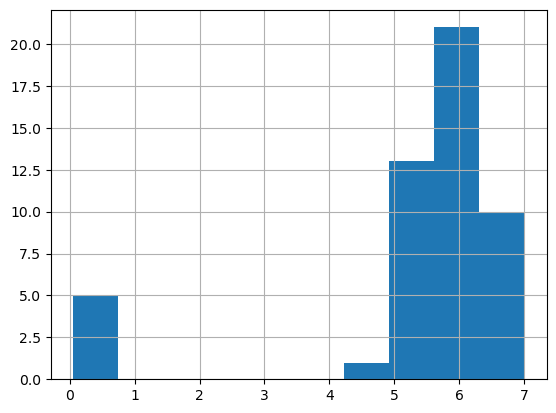

In [14]:
#花萼長度也有些異常資料
iris_data.loc[cond, 'sepal_length'] *= 100.0
iris_data.loc[iris_data['species'] == 'Iris-versicolor','sepal_length'].hist()
plt.show()

In [15]:
cond = (iris_data['species'] == 'Iris-versicolor') & (iris_data['sepal_length'] < 1.0)
iris_data.loc[cond]

,sepal_length,sepal_width,petal_length,petal_width,species
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


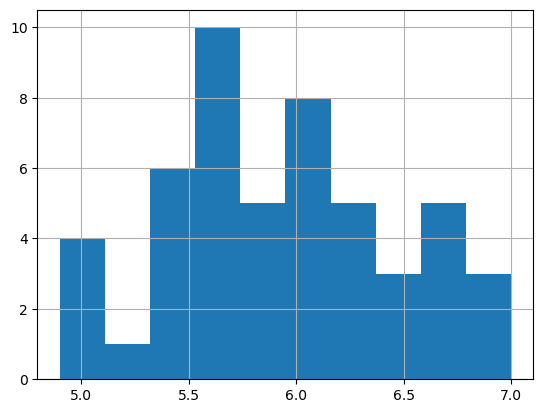

In [16]:
#此處發現似乎是小數點點錯位置,與其他資料差兩位數.原因可能是將使用公尺當作單位,正確單位應該為公分
iris_data.loc[cond, 'sepal_length'] *= 100.0
iris_data.loc[iris_data['species'] == 'Iris-versicolor','sepal_length'].hist()
plt.show()

In [17]:
#找出有空值的資料
iris_data.loc[(iris_data['sepal_length'].isnull())|
              (iris_data['sepal_width'].isnull())|
              (iris_data['petal_length'].isnull())|
              (iris_data['petal_width'].isnull())]

,sepal_length,sepal_width,petal_length,petal_width,species
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [18]:
#因為空值都來自於Iris-setosa類別的petal_width_cm欄位且只有5筆,但是花瓣寬度對樣本具有重大意義,所以採用均值代替原本的空值
Setosa = iris_data['species'] == 'Iris-setosa'
avg_petal_width = iris_data.loc[Setosa, 'petal_width'].mean()
iris_data.loc[Setosa & (iris_data['petal_width'].isnull()), 'petal_width'] = avg_petal_width
iris_data.loc[Setosa & (iris_data['petal_width'] == avg_petal_width)]

,sepal_length,sepal_width,petal_length,petal_width,species
7,5.0,3.4,1.5,0.25,Iris-setosa
8,4.4,2.9,1.4,0.25,Iris-setosa
9,4.9,3.1,1.5,0.25,Iris-setosa
10,5.4,3.7,1.5,0.25,Iris-setosa
11,4.8,3.4,1.6,0.25,Iris-setosa


In [19]:
#驗證是否已經消除空值
iris_data.loc[(iris_data['sepal_length'].isnull())|
              (iris_data['sepal_width'].isnull())|
              (iris_data['petal_length'].isnull())|
              (iris_data['petal_width'].isnull())]

,sepal_length,sepal_width,petal_length,petal_width,species


In [20]:
sns.set(style='ticks')

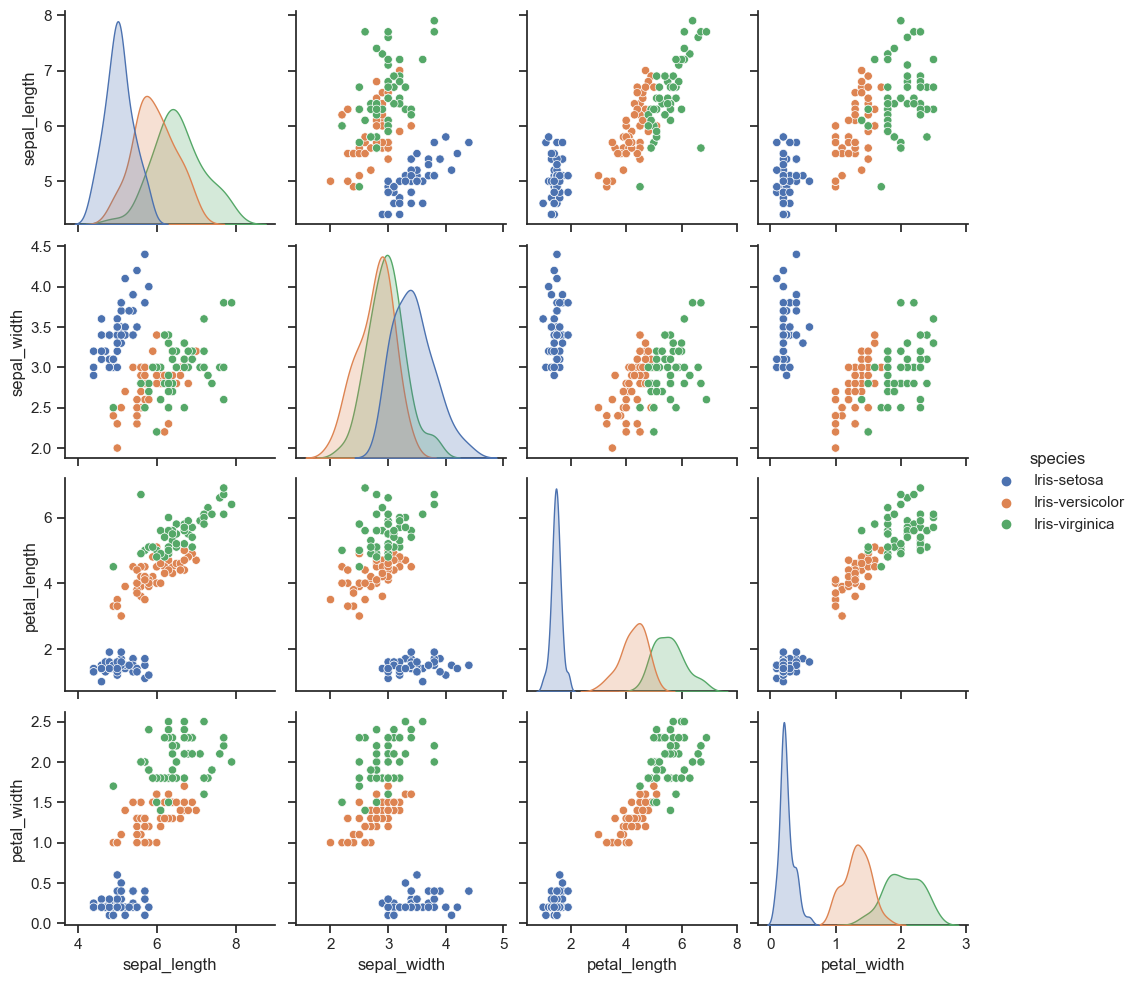

In [21]:
#類別為3種,異常值與空值已經處理
sns.pairplot( iris_data, hue='species' )
plt.show()

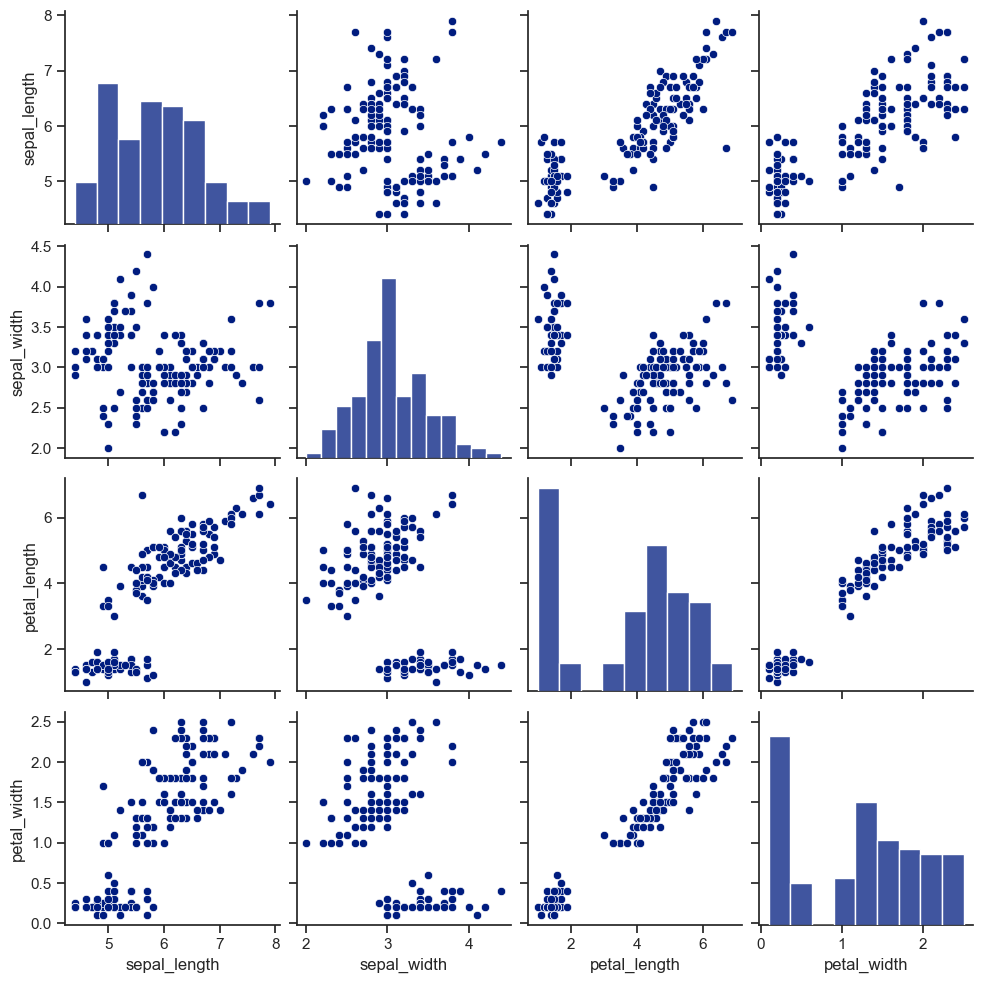

In [22]:
#如果資料集沒有類別欄位可供使用,則不要加上hue參數,此時圖表也將以單色繪製
sns.set_style('ticks')
sns.set_palette('dark')
sns.pairplot(iris_data)
plt.show()

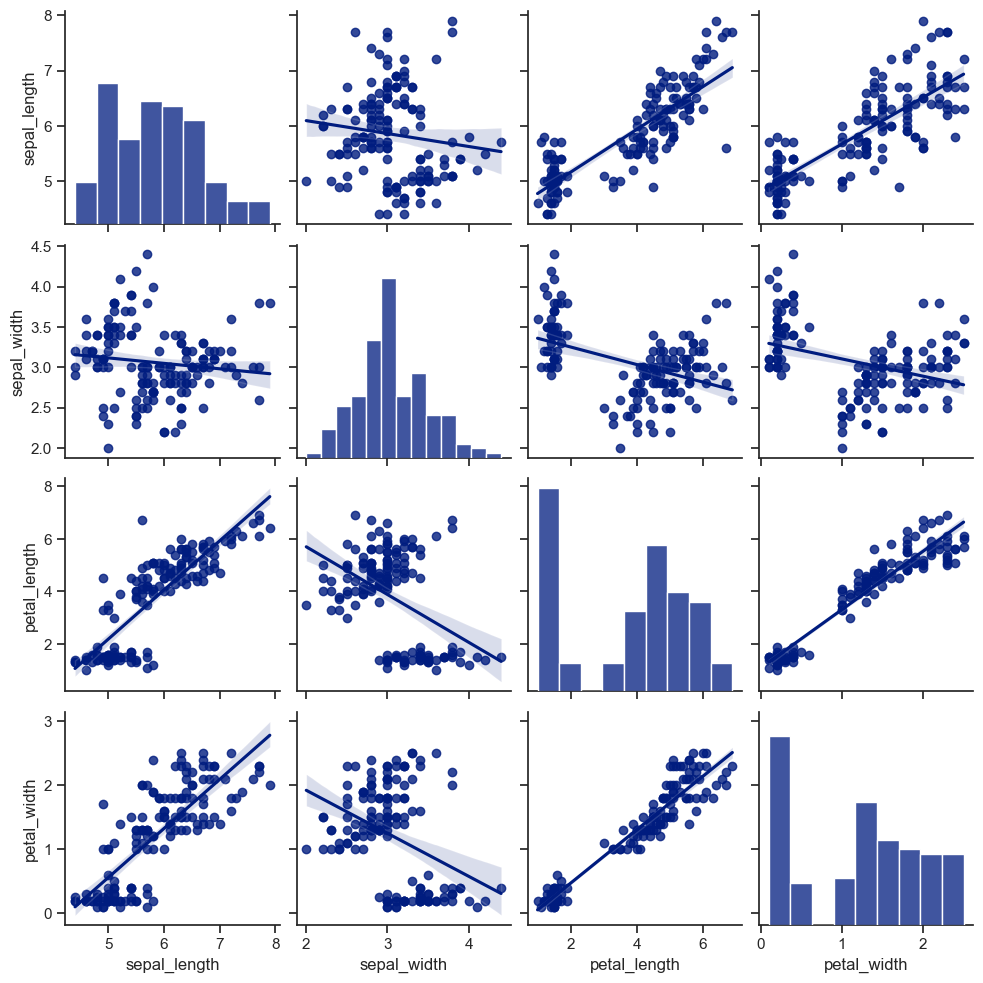

In [23]:
sns.set_style('ticks')
sns.set_palette('dark')
sns.pairplot(iris_data,kind='reg' )
plt.show()

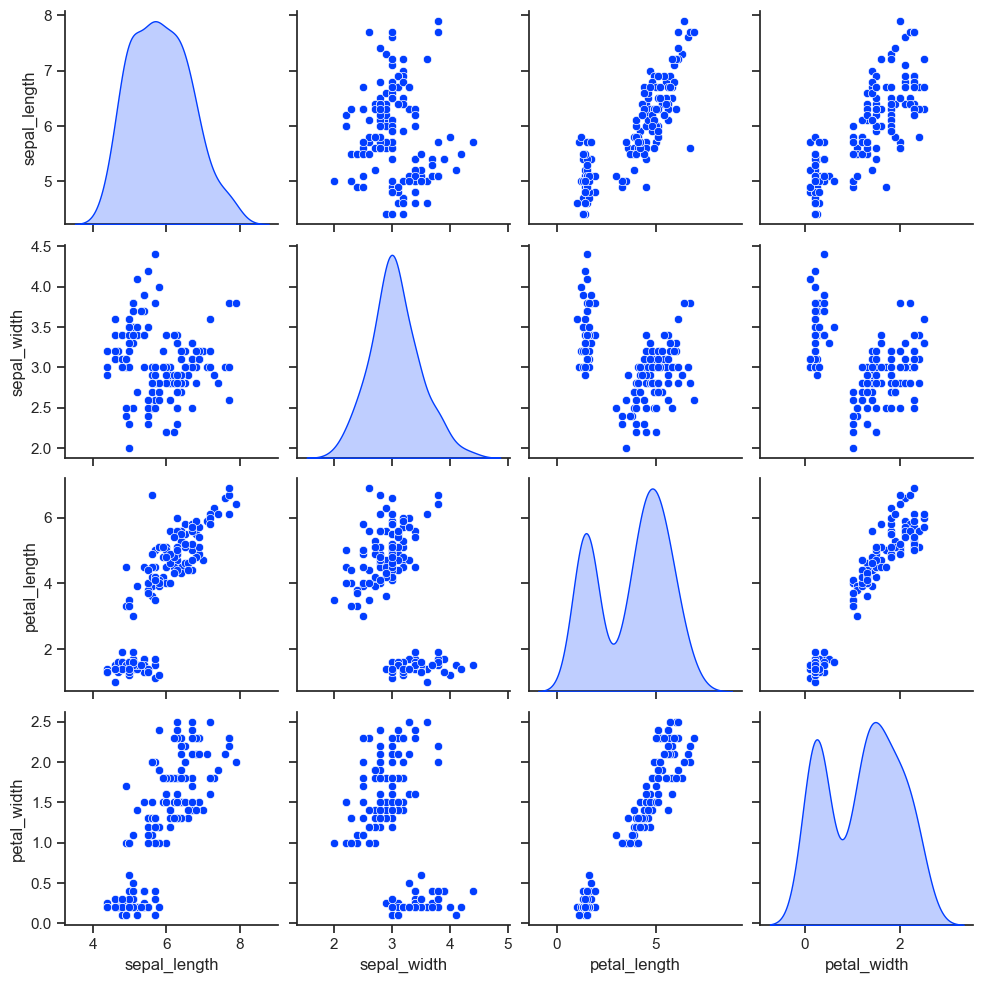

In [24]:
sns.set_palette('bright')
sns.pairplot(iris_data,diag_kind='kde' )
plt.show()

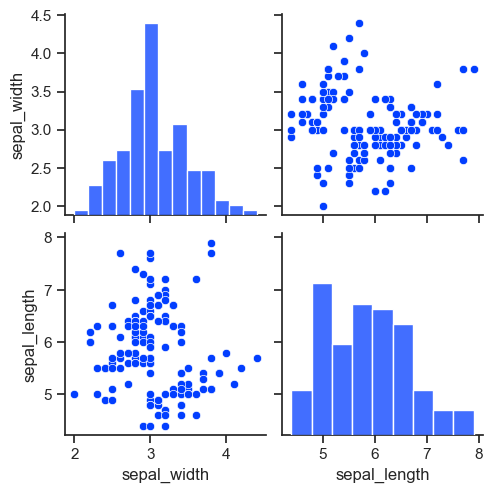

In [25]:
#僅使用部分欄位繪製
sns.pairplot(iris_data,vars=['sepal_width','sepal_length'])
plt.show()

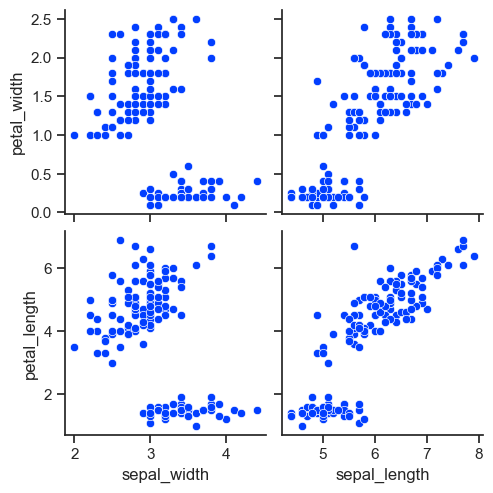

In [26]:
#明確指定x,y軸
sns.pairplot(iris_data,x_vars=['sepal_width','sepal_length'],
                       y_vars=['petal_width','petal_length'])

plt.show()

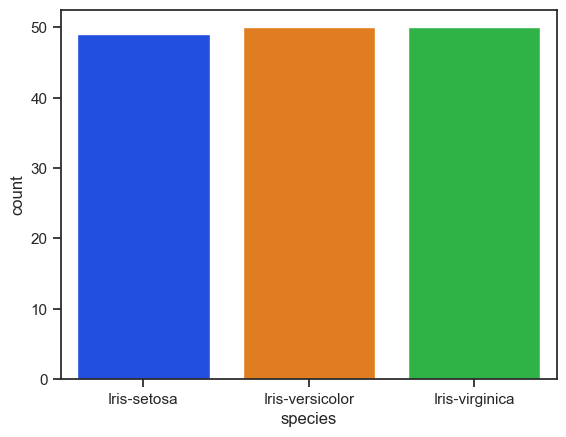

In [27]:
sns.countplot(x='species',data=iris_data)
plt.show()

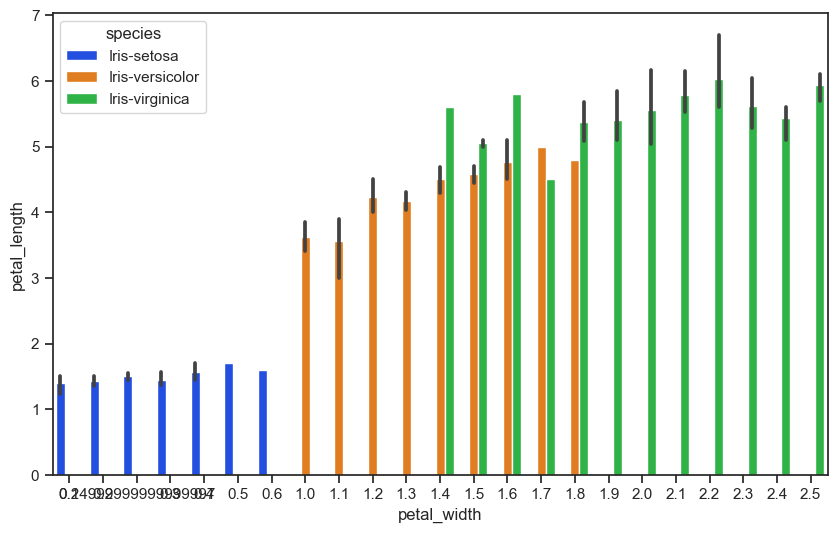

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x='petal_width',y='petal_length',hue='species',data=iris_data)
plt.show()

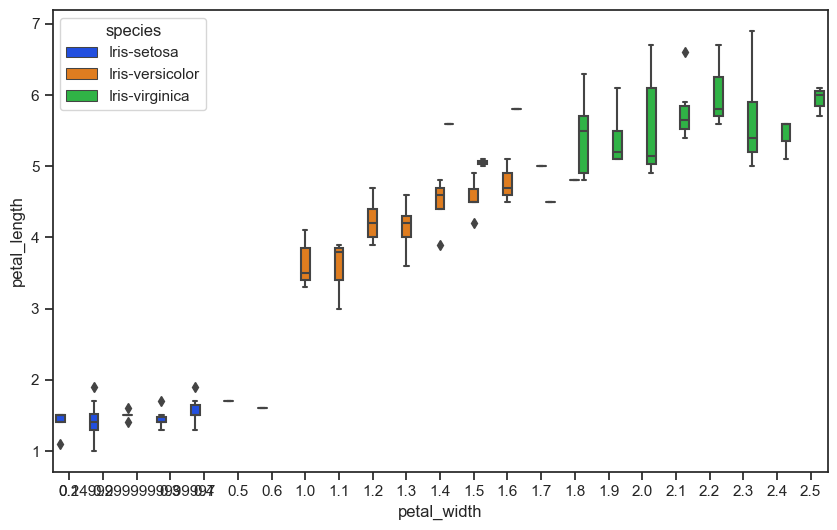

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x='petal_width',y='petal_length',hue='species',data=iris_data)
plt.show()

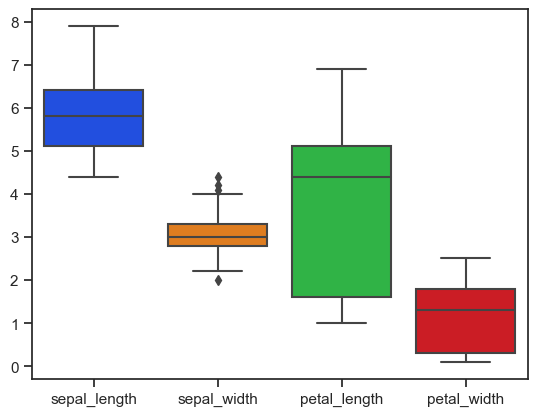

In [30]:
sns.boxplot(data=iris_data)
plt.show()

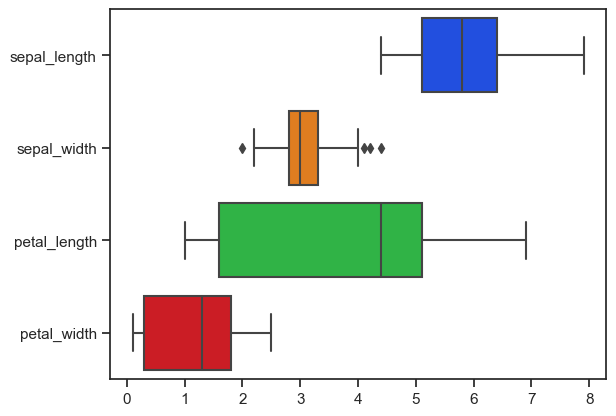

In [31]:
sns.boxplot(data=iris_data,orient='h')
plt.show()

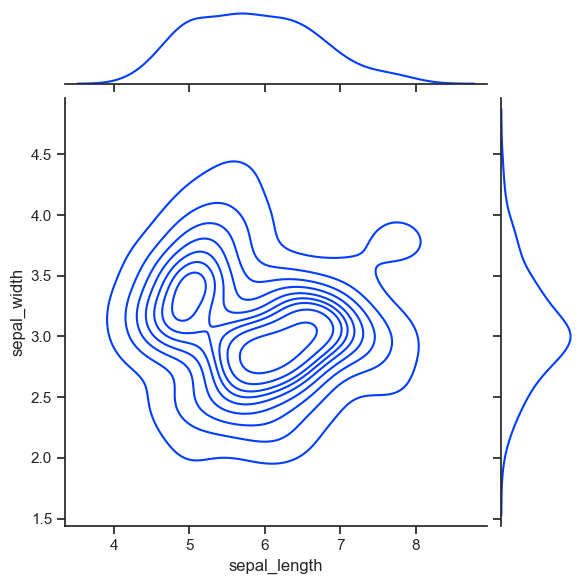

In [32]:
sns.jointplot(x='sepal_length',y='sepal_width',data=iris_data,kind='kde')
plt.show()

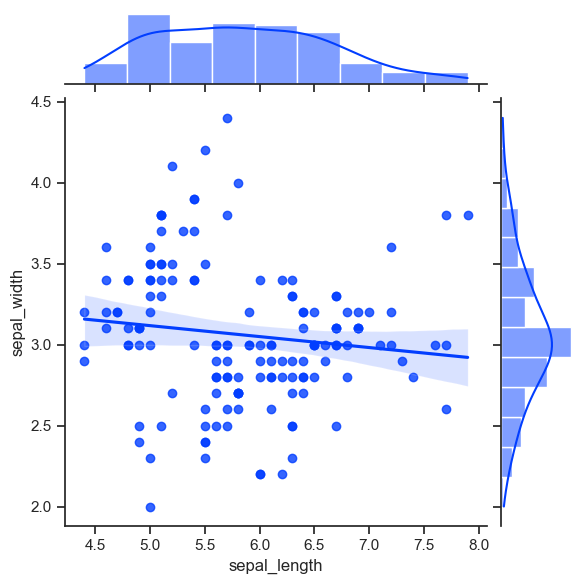

In [33]:
sns.jointplot(x='sepal_length',y='sepal_width',data=iris_data,kind='reg')
plt.show()

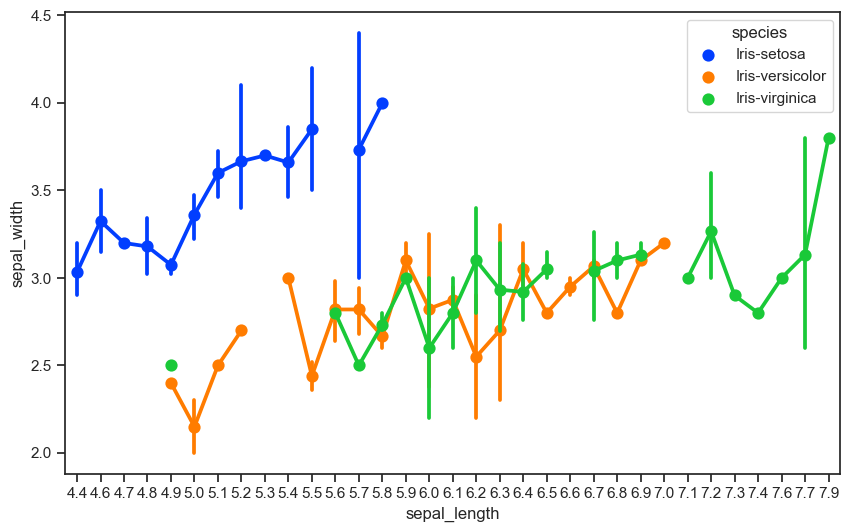

In [34]:
plt.figure(figsize=(10,6))
sns.pointplot(x='sepal_length',y='sepal_width',hue='species',data=iris_data)
plt.show()